In [1]:
%reset -f
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio
import sebaba.ml as sbbml
import sebaba.utils as utils
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [3]:
pd.options.display.float_format = "{:.4f}".format

In [4]:
mat = sio.loadmat("data/ex3data.mat")
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:
x = mat["X"]
y = mat["y"]

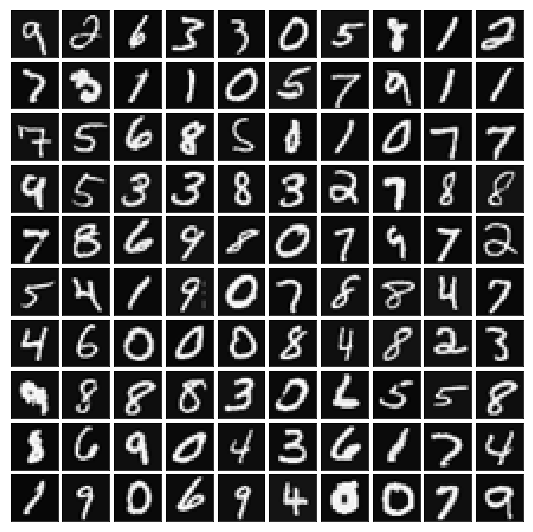

In [6]:
nrows = 10
ncols = 10

fig, ax = plt.subplots(nrows, ncols, sharex = True, sharey = True, figsize = (7.5, 7.5))

for i in range(nrows):
    for j in range(ncols):
        k   = np.random.randint(0, 5000)
        img = np.transpose(x[k].reshape(20, 20))
        ax[i,j].imshow(img, cmap = "gray")
        ax[i,j].margins(0.0)

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

plt.show()

In [7]:
x_train, x_test, y_train, y_test = utils.split_train_test(x, y, prop_train = 80)

In [8]:
model = sbbml.KNNClassifier()
model.fit(x_train, y_train)

In [9]:
y_prime = model.predict(x_test, k = 3)
utils.accuracy(y_prime, y_test)

0.941

In [10]:
data = pd.read_csv("data/ex1data.tsv", sep = "\t"); data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


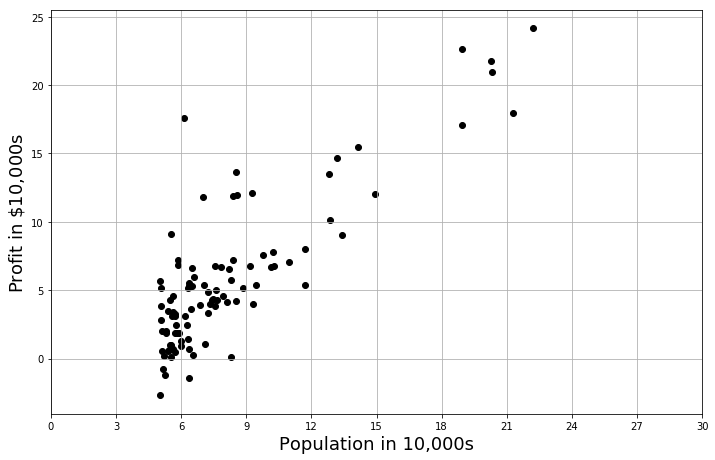

In [11]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.scatter(data = data, x = "population", y = "profit", c = "k", marker = "o")
ax.set_ylabel("Profit in $\$$10,000s", fontsize = 18)
ax.set_xlabel("Population in 10,000s", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.xlim(0, 30)
plt.show()

In [12]:
x = data[["population"]].values
y = data[["profit"]].values

In [13]:
x_train, x_test, y_train, y_test = utils.split_train_test(x, y, prop_train = 80)

In [14]:
model = sbbml.KNNRegression()
model.fit(x_train, y_train)

In [15]:
y_prime = model.predict(x_test, k = 3)
utils.root_mean_squared_error(y_prime, y_test)

25.8276264271669

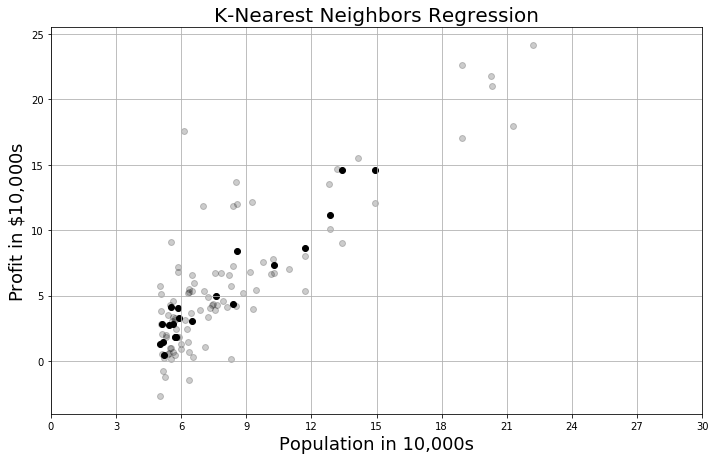

In [16]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.scatter(data = data, x = "population", y = "profit", alpha = 0.2, c = "k", marker = "o")
ax.scatter(x_test, y_prime, c = "k")
ax.set_title("K-Nearest Neighbors Regression", fontsize = 20)
ax.set_ylabel("Profit in $\$$10,000s", fontsize = 18)
ax.set_xlabel("Population in 10,000s", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.xlim(0, 30)
plt.show()